#### First we need to prepare the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
DATADIR="./Train"  #Directory where images are stored in folder Cat and Dog
CATEGORIES=["Cat", "Dog"] #Equivalent to the names given in parent directory
IMG_SIZE=60 #This is used to standardize the size of the image
train_data=[] #Array to store the training data
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num= CATEGORIES.index(category) #Cat:0 and Dog:1
        for img in os.listdir(path):
            try:   #Error is called if any broken image is encountered
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # For the sake of simplicity we are converting images into grayscale
                new_array= cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) 
                train_data.append([new_array,class_num])
            except Exception as e:
                pass 
create_training_data()

In [6]:
print(len(train_data))

40


As we expected, we have 40 training data points.
#### Now we have to shuffle the data. Although it is not required here as we are using KNN and the data shuffling dosen't really matter. But in case of perceptron the data shuffling is of quite significance.

In [7]:
import random
random.shuffle(train_data) #As train_data is a list hence random.shuffle is iterable

In [8]:
train_X=[] 
train_Y=[]
for features, labels in train_data:
    train_X.append(features)
    train_Y.append(labels)

#### Our training data is now fully prepared. I have demonstrated one example below.

It is a Dog


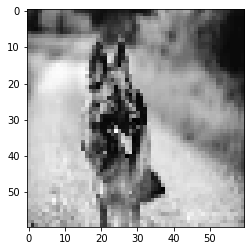

In [9]:
plt.imshow(train_X[1], cmap='gray')
print("It is a", CATEGORIES[train_Y[1]])
plt.show()

##### As we have now completed the data collection and compilation. We need to look at feature engineering. Here we can think of data augmentation, wherein we rotate the images at certain angle to produce more data. Essentially we are fooling machine to believe that the resultant image is different from input image. This increases our data set and improves training accuracy.
To keep the matter simple we are just going to rotate our images by 180 degrees. This will add 40 points to our training data.

In [10]:
for feature, label in train_data:
    mirror_image=np.fliplr(feature) #Rotating each image by 180 degree
    train_X.append(mirror_image)
    train_Y.append(label)

In [11]:
print(len(train_X))
print(len(train_Y))

80
80


#### Eureka! We have just converted our 40 image dataset into 80 without much hassle. Let's start with KNN.

In [12]:
DATADIR="/Users/kartikeygarg/Desktop/Assignment/Test"  #Directory where images are stored in folder Cat and Dog
CATEGORIES=["Cat", "Dog"] #Equivalent to the names given in parent directory
IMG_SIZE=60 #This is used to standardize the size of the image
train_data=[] #Array to store the training data
def create_testing_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num= CATEGORIES.index(category) #Cat:0 and Dog:1
        for img in os.listdir(path):
            try:   #Error is called if any broken image is encountered
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # For the sake of simplicity we are converting images into grayscale
                new_array= cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) 
                train_data.append([new_array,class_num])
            except Exception as e:
                pass 
create_testing_data()
import random
random.shuffle(train_data)
test_X=[] 
test_Y=[]
for features, labels in train_data:
    test_X.append(features)
    test_Y.append(labels)

In [9]:
import math

In [10]:
def distance(train_X_point,test_X_point):
    Sum=0;
    euclidean_distance=round(np.sqrt(np.sum(np.square(np.subtract(train_X_point,test_X_point)))),3)
    return euclidean_distance

In [11]:
def smallest_set(K,train_X,train_Y,test_X_point):
    desc_set=[]
    for i in range(len(train_X)):
        desc_set.append([distance(train_X[i],test_X_point),train_Y[i]])
    return sorted(desc_set,key= lambda x: x[0])

In [12]:
def classify(K, train_X, train_Y, test_X_point):
    smallest_dict=smallest_set(K,train_X,train_Y,test_X_point)
    #We are going to evaluate weight for each point
    for i in range(len(smallest_dict)):
        smallest_dict[i][0]=(-smallest_dict[i][0]+smallest_dict[K-1][0])/(-smallest_dict[0][0]+smallest_dict[K-1][0])
    #Now lets add the weight for the respective classes and classify test_X_point
    class_1=0
    class_2=0
    for i in range(len(smallest_dict)):
        if(smallest_dict[i][1]==0):
            class_1+=smallest_dict[i][0]
        else:
            class_2+=smallest_dict[i][0]
    if(class_1>class_2):
        return 0
    else:
        return 1

In [13]:
def KNN(K, train_X, train_Y, test_X):
    test_Y=[]
    for i in range(len(test_X)):
        test_Y.append(classify(K, train_X, train_Y, test_X[i]))
    return test_Y

In [14]:
def accuracy(predict_Y, test_Y):
    predict_Y=np.array(predict_Y)
    test_Y=np.array(test_Y)
    result=np.subtract(predict_Y,test_Y)
    return 1-(sum(abs(result))/len(predict_Y))

In [15]:
accu_dict={}
for i in range(5,81,5):
    predict_Y=KNN(i, train_X, train_Y, test_X)  
    accu_dict[i]=accuracy(predict_Y,test_Y)

In [16]:
print(accu_dict)

{5: 0.75, 10: 1.0, 15: 0.75, 20: 0.5, 25: 0.75, 30: 0.75, 35: 0.75, 40: 0.5, 45: 0.75, 50: 0.75, 55: 0.75, 60: 0.5, 65: 0.5, 70: 0.75, 75: 0.5, 80: 0.5}


#### As we are highest accuracy somwhere between 5 and 15 we can iterate over these values

In [21]:
accu_dict2={}
for i in range(1,20,1):
    predict_Y=KNN(i, train_X, train_Y, test_X)
    accu_dict2[i]=accuracy(predict_Y,test_Y)

<ipython-input-12-752cf2e6b9ff>:5: RuntimeWarning: invalid value encountered in double_scalars
  smallest_dict[i][0]=(-smallest_dict[i][0]+smallest_dict[K-1][0])/(-smallest_dict[0][0]+smallest_dict[K-1][0])


In [22]:
print(accu_dict2)

{1: 0.5, 2: 0.5, 3: 0.25, 4: 0.5, 5: 0.75, 6: 0.75, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 0.75, 13: 0.75, 14: 0.75, 15: 0.75, 16: 0.5, 17: 0.75, 18: 0.5, 19: 0.75}


#### It is clear from above iteration that model achieves highest accuracy between 7-11. This model has achieved perfect accuracy.

In [19]:
predict_Y=KNN(10, train_X, train_Y, test_X)  
accu=accuracy(predict_Y,test_Y)

It is a Cat


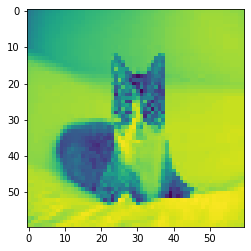

In [20]:
plt.imshow(test_X[0])
print("It is a",CATEGORIES[predict_Y[0]])
plt.show()